# GCNによるKarateclub埋め込み

デフォルトはノード0,4,8,24が教師データ

! conda activate kmedoids

In [28]:

import time
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx
from torch_geometric.datasets import KarateClub
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import gcn
from gcn import GCN
import numpy as np
from sklearn_extra.cluster import KMedoids #K-Medoids
from sklearn.metrics.cluster import adjusted_rand_score #ARI
import random
import sys
from statistics import stdev


In [29]:
LOUVAIN = "LOUVAIN"
KARATE = "KARATE"
K4 = "K4"


In [30]:
#すべてを学習データで学習させるか
TRAIN_ALL = False 

# デフォルトの一部の学習データ(ノード0,4,8,24)で学習させるか。Falseの場合ランダム
DEFAULT = False

#ランダムのデータで学習する場合の学習データ(ノード情報)数
NUM_TRAIN = 6

#エポック数
EPOCH = 100

#学習状況及び結果を図示するか
VIEW_TRAIN = False

#実行回数
TIMES = 50

#  クラスタ数
N_CLUSTER = 2

#GCNの学習に使う教師データ KARATE or LOUVAIN
TRUE_LABEL = K4




#==========================================================

if NUM_TRAIN>34 :
    sys.exit("ノード数は34以下の必要があります")

if TRUE_LABEL == LOUVAIN:
    TRUE_LABEL = gcn.read_csv("louvain.txt")
    
elif TRUE_LABEL == KARATE:
    TRUE_LABEL = gcn.draw_karateclub()
    
elif TRUE_LABEL==K4 :
    TRUE_LABEL = KarateClub()[0].y.detach().numpy()
    



In [40]:
KarateClub()[0].y.detach().numpy()


array([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

===========================1回目============================
Trained_node_number_is : [3, 5, 12, 14, 27, 30]


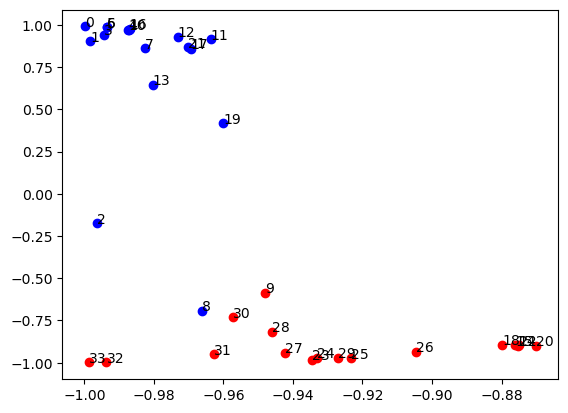

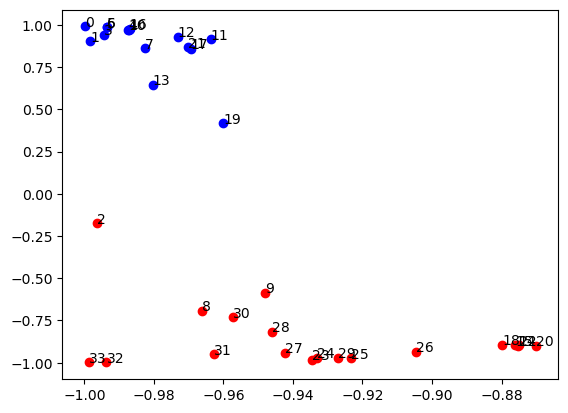

1回目 ARI : 0.7717250324254216

===========================2回目============================
Trained_node_number_is : [2, 6, 11, 23, 24, 29]


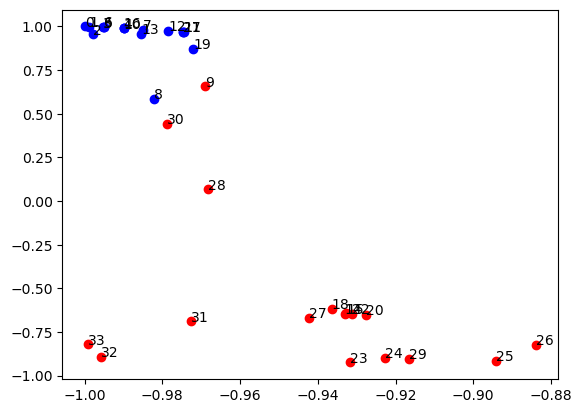

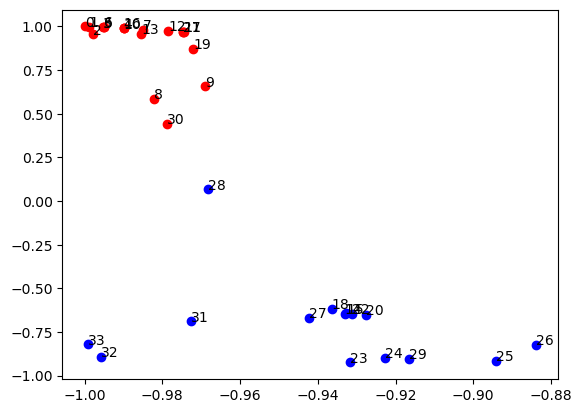

2回目 ARI : 0.7717250324254216

===========================3回目============================
Trained_node_number_is : [1, 2, 5, 14, 18, 31]


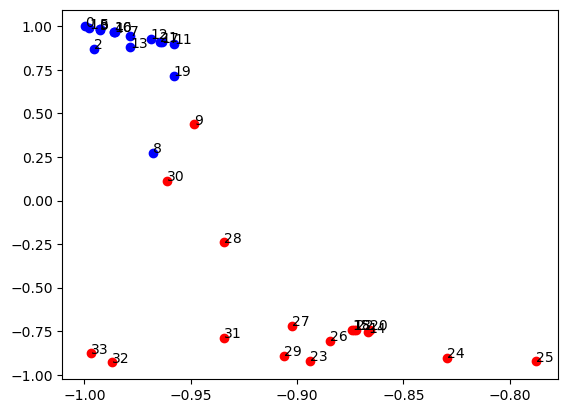

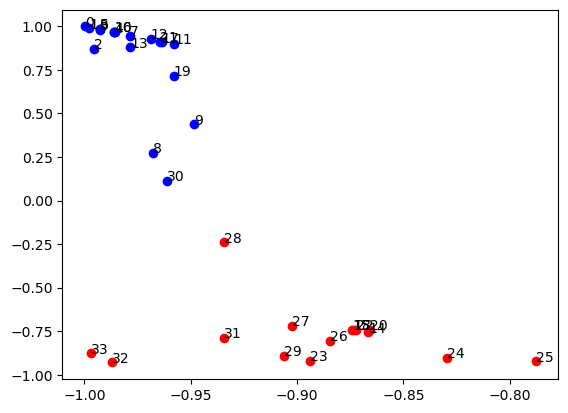

3回目 ARI : 0.7717250324254216

===========================4回目============================
Trained_node_number_is : [2, 4, 13, 26, 28, 32]


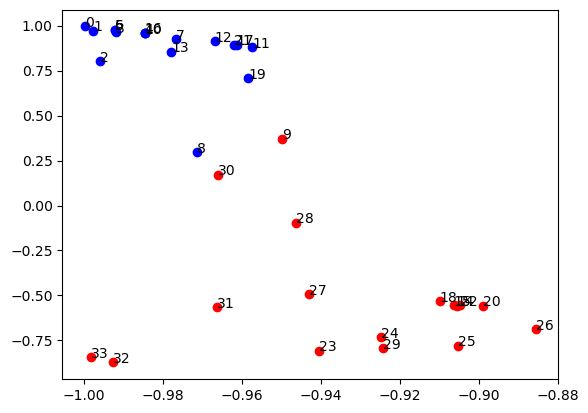

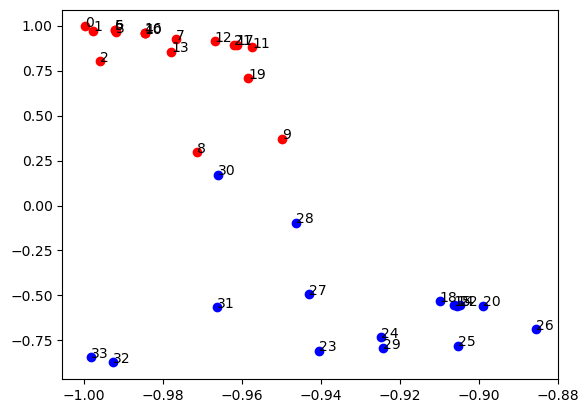

4回目 ARI : 0.8822575413558222

===========================5回目============================
Trained_node_number_is : [2, 3, 5, 14, 30, 33]


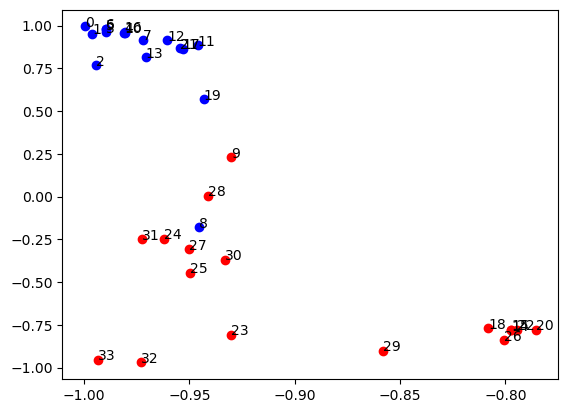

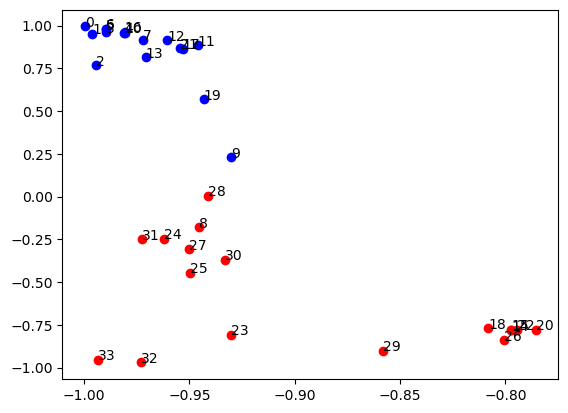

5回目 ARI : 0.7716262975778547

===========================6回目============================
Trained_node_number_is : [2, 6, 19, 20, 28, 32]


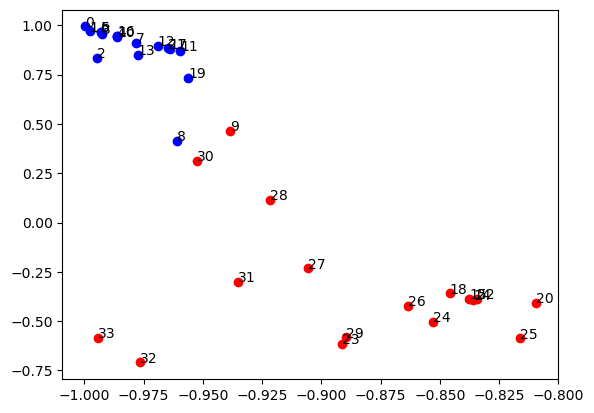

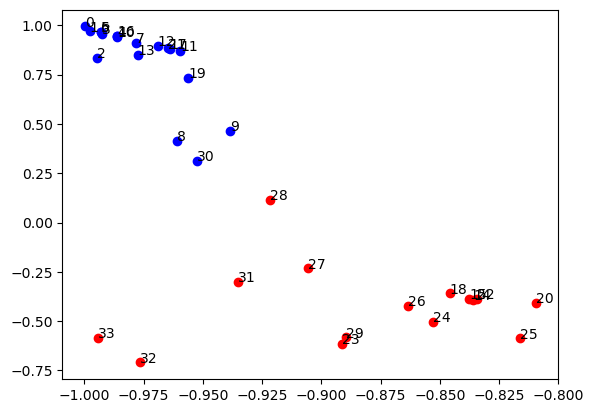

6回目 ARI : 0.7717250324254216

===========================7回目============================
Trained_node_number_is : [1, 6, 16, 18, 32, 33]


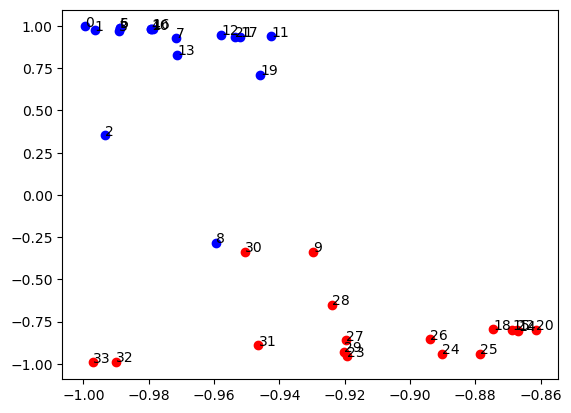

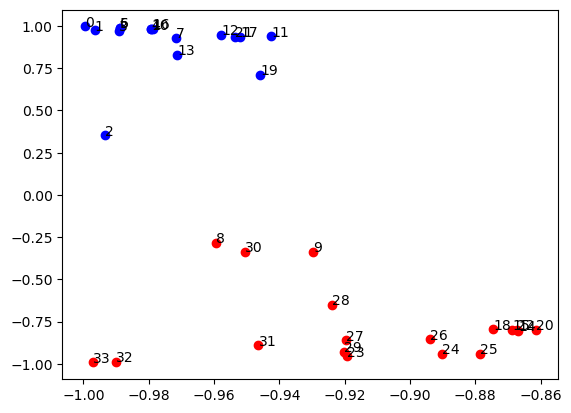

7回目 ARI : 0.8822575413558222

===========================8回目============================
Trained_node_number_is : [0, 4, 8, 25, 27, 30]


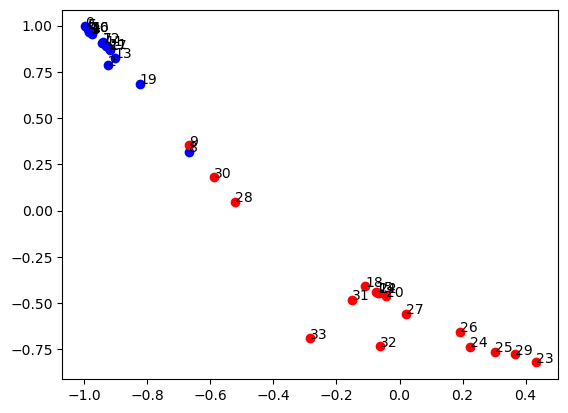

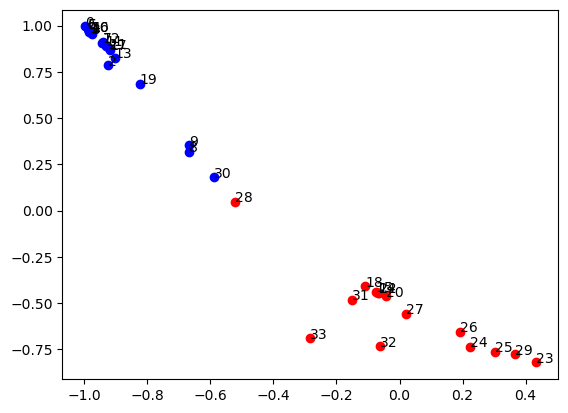

8回目 ARI : 0.7717250324254216

===========================9回目============================
Trained_node_number_is : [9, 11, 17, 19, 25, 31]


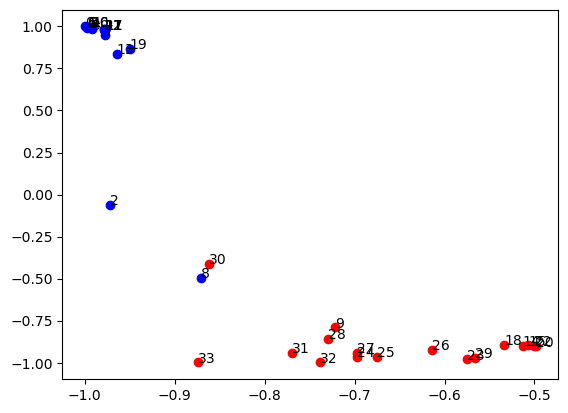

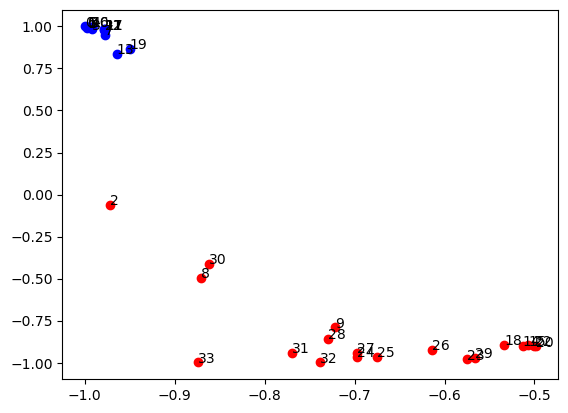

9回目 ARI : 0.7717250324254216

===========================10回目============================
Trained_node_number_is : [5, 7, 13, 25, 29, 30]


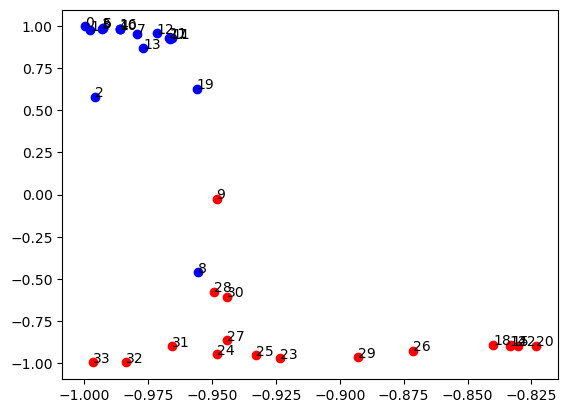

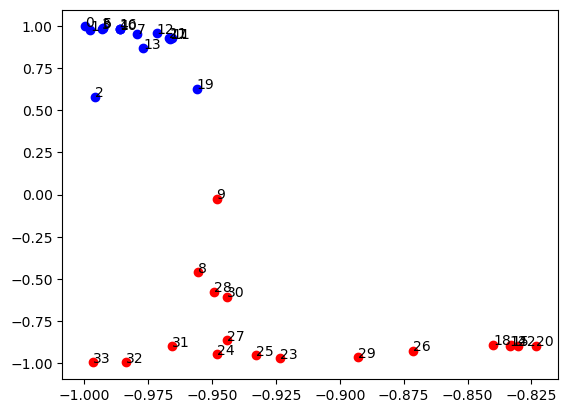

10回目 ARI : 0.8822575413558222

===========================11回目============================
Trained_node_number_is : [2, 3, 21, 24, 25, 32]


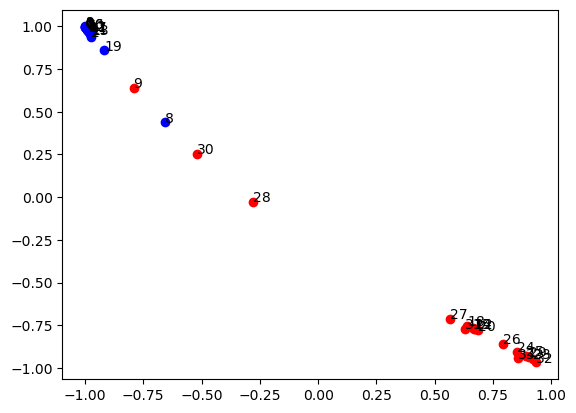

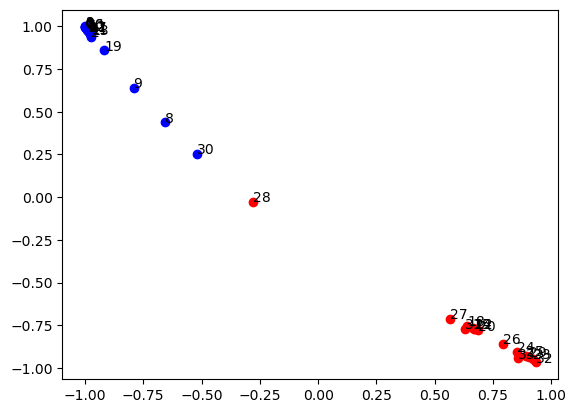

11回目 ARI : 0.7717250324254216

===========================12回目============================
Trained_node_number_is : [0, 13, 15, 16, 24, 31]


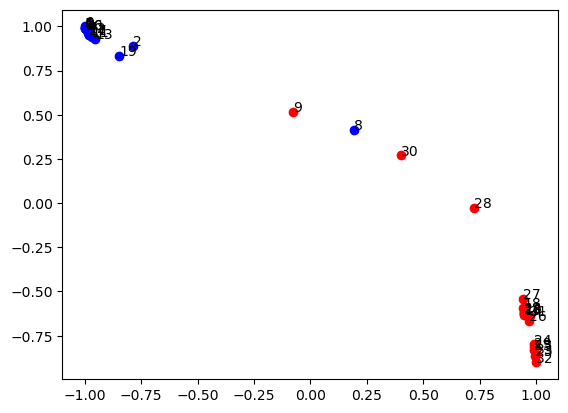

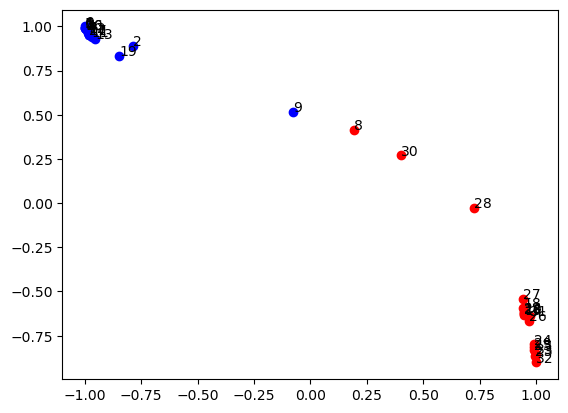

12回目 ARI : 0.7716262975778547

===========================13回目============================
Trained_node_number_is : [3, 6, 15, 16, 18, 30]


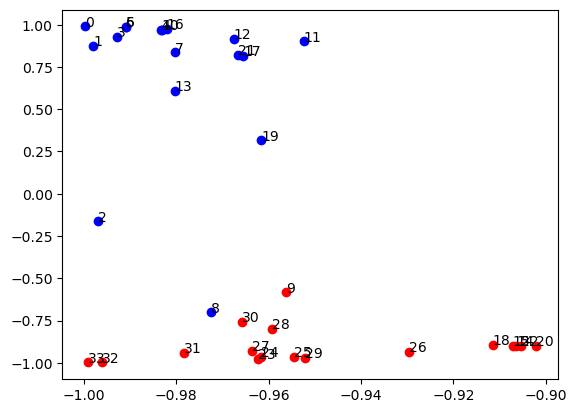

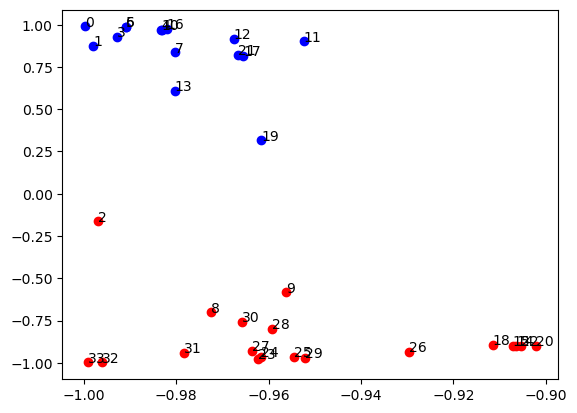

13回目 ARI : 0.7717250324254216

===========================14回目============================
Trained_node_number_is : [0, 5, 17, 22, 23, 28]


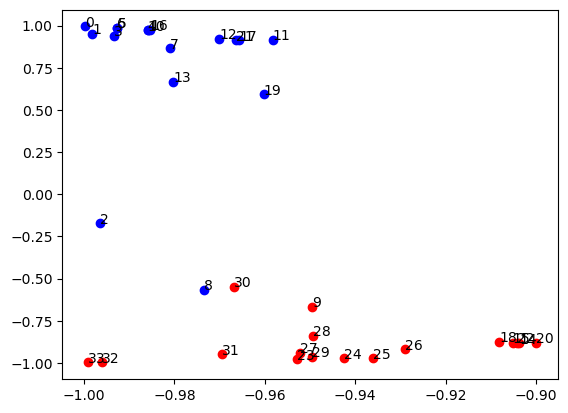

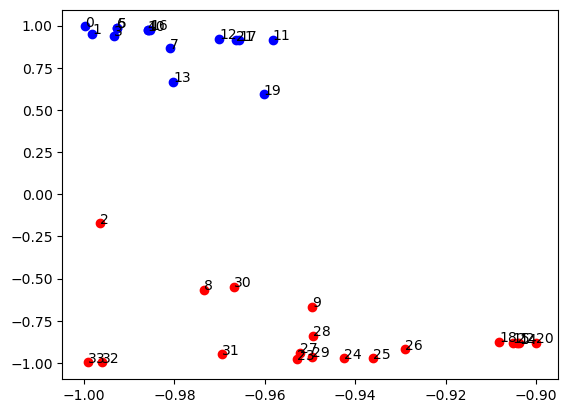

14回目 ARI : 0.7717250324254216

===========================15回目============================
Trained_node_number_is : [2, 7, 12, 24, 27, 31]


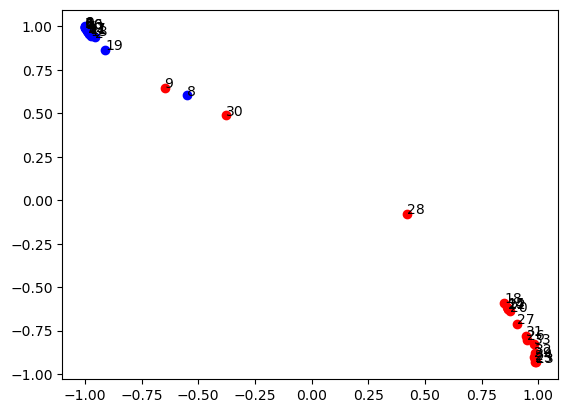

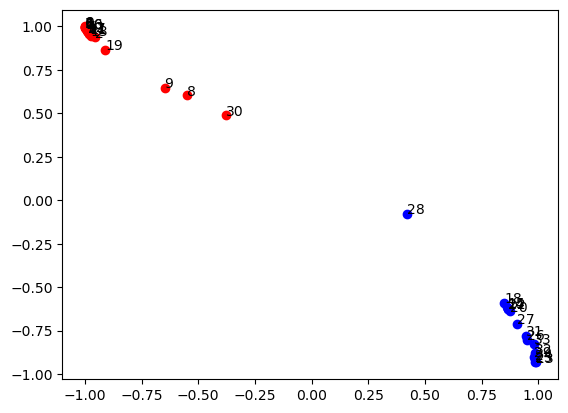

15回目 ARI : 0.7717250324254216

===========================16回目============================
Trained_node_number_is : [0, 16, 17, 20, 24, 26]


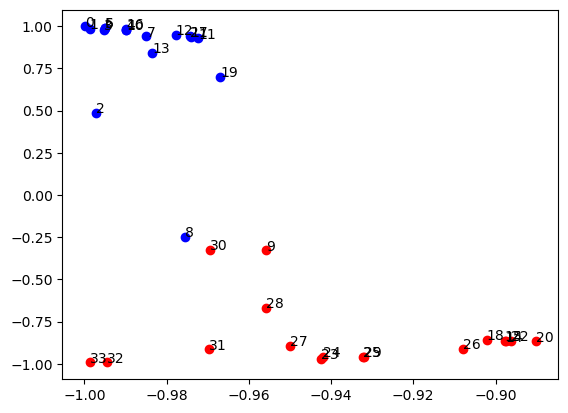

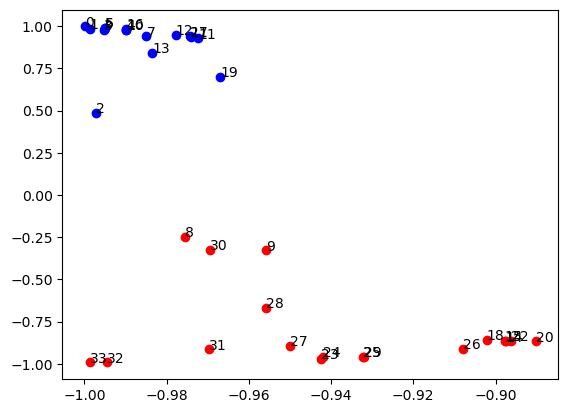

16回目 ARI : 0.8822575413558222

===========================17回目============================
Trained_node_number_is : [5, 7, 15, 16, 30, 33]


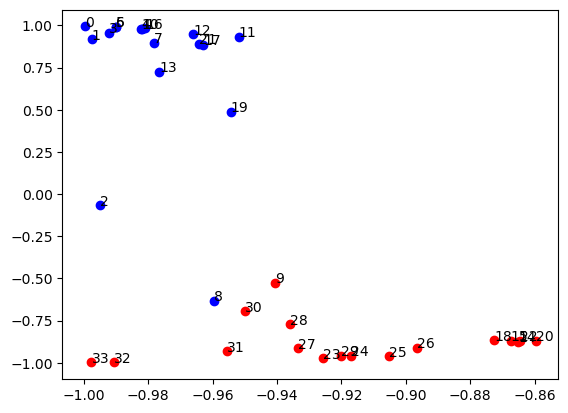

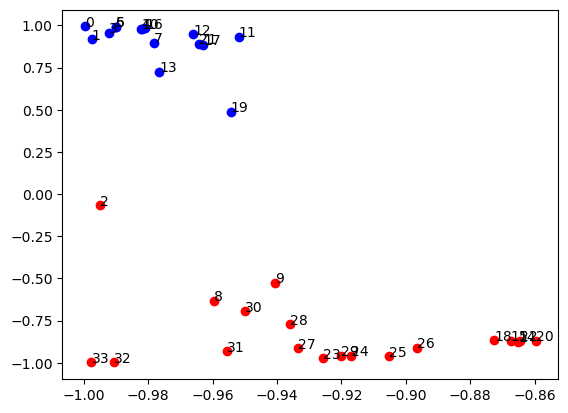

17回目 ARI : 0.7717250324254216

===========================18回目============================
Trained_node_number_is : [1, 3, 14, 16, 18, 33]


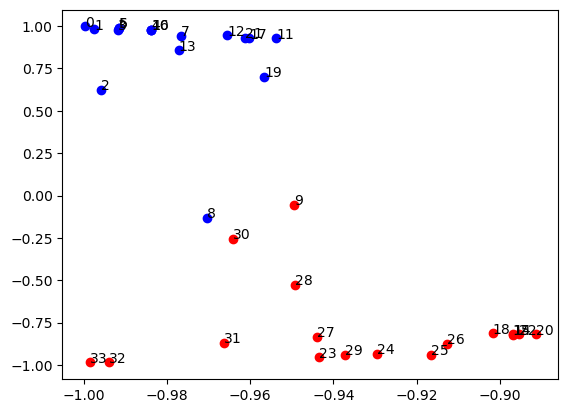

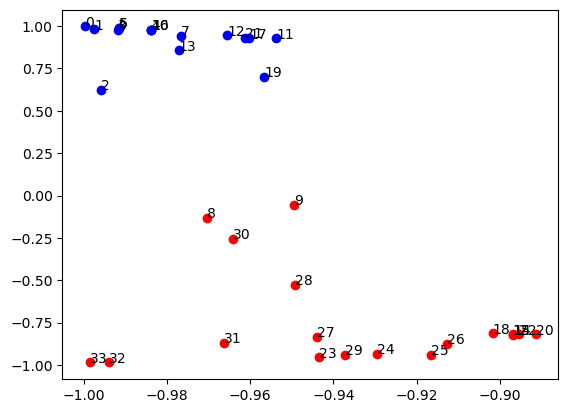

18回目 ARI : 0.8822575413558222

===========================19回目============================
Trained_node_number_is : [1, 4, 8, 18, 20, 24]


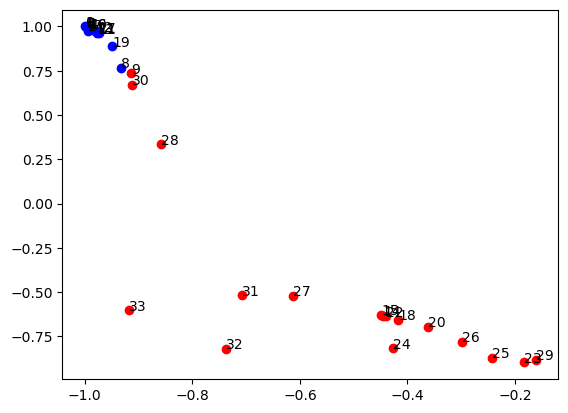

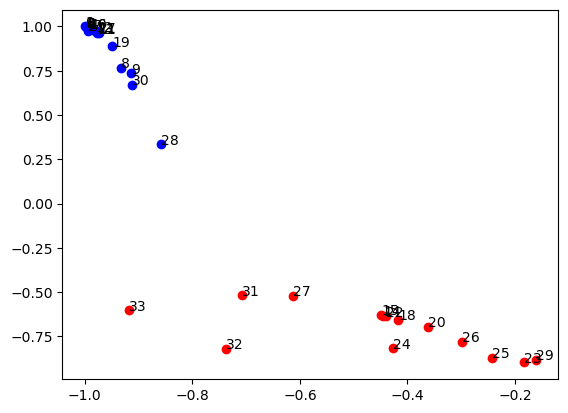

19回目 ARI : 0.6684671059738576

===========================20回目============================
Trained_node_number_is : [0, 6, 19, 26, 30, 32]


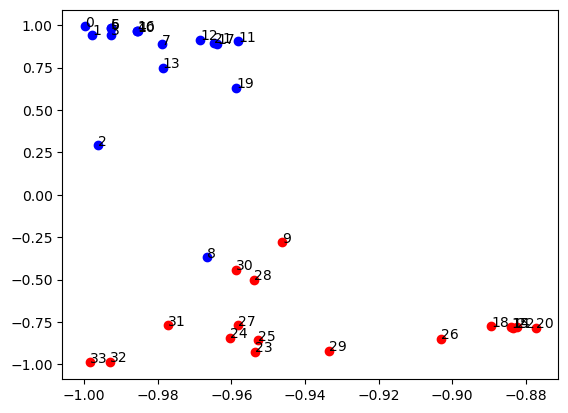

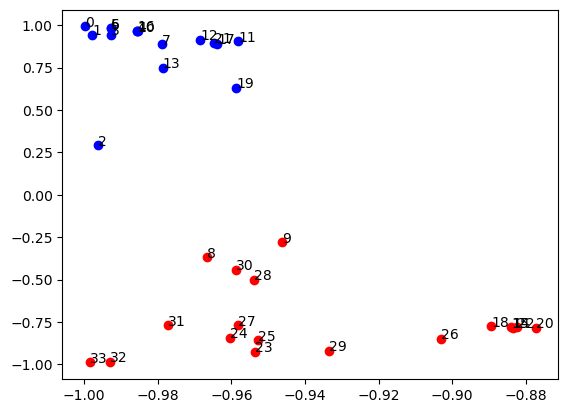

20回目 ARI : 0.8822575413558222

===========================21回目============================
Trained_node_number_is : [0, 11, 15, 17, 22, 32]


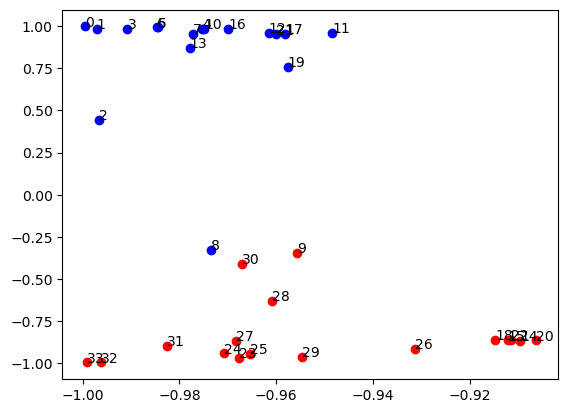

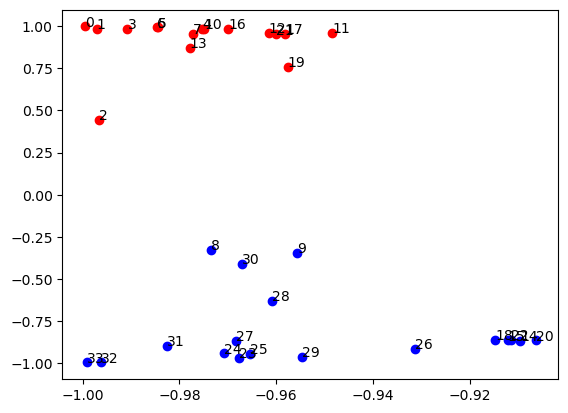

21回目 ARI : 0.8822575413558222

===========================22回目============================
Trained_node_number_is : [6, 7, 8, 15, 28, 32]


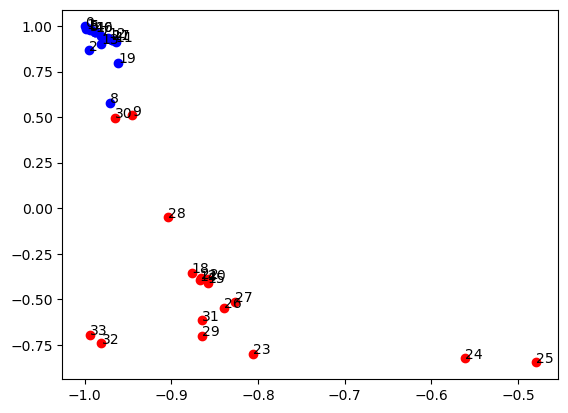

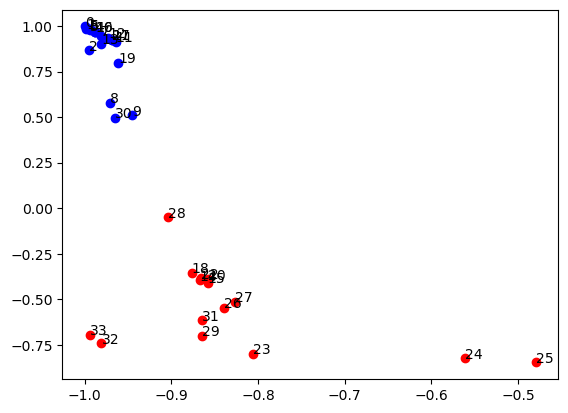

22回目 ARI : 0.7717250324254216

===========================23回目============================
Trained_node_number_is : [7, 11, 21, 26, 27, 33]


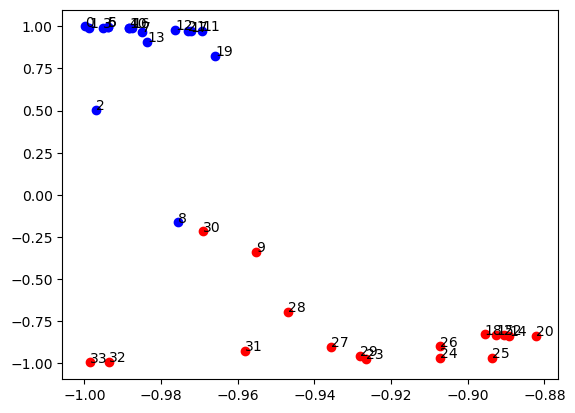

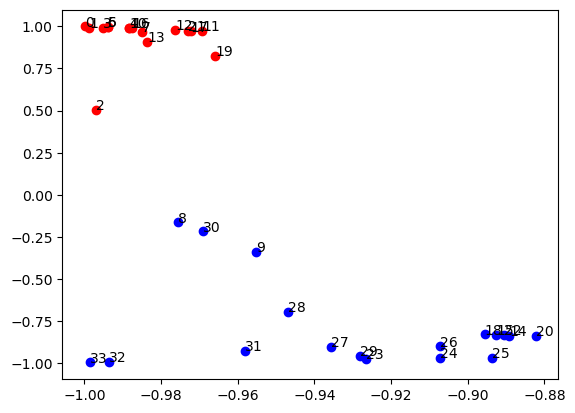

23回目 ARI : 0.8822575413558222

===========================24回目============================
Trained_node_number_is : [0, 16, 19, 20, 29, 30]


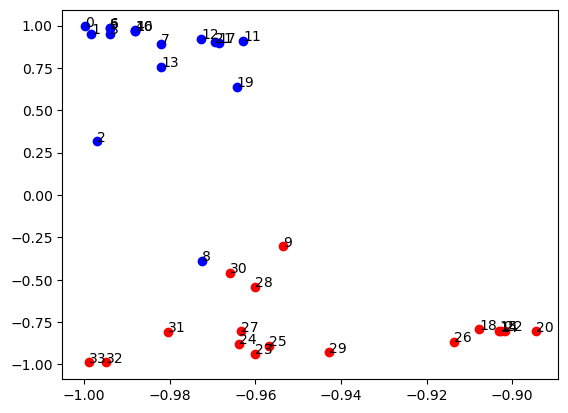

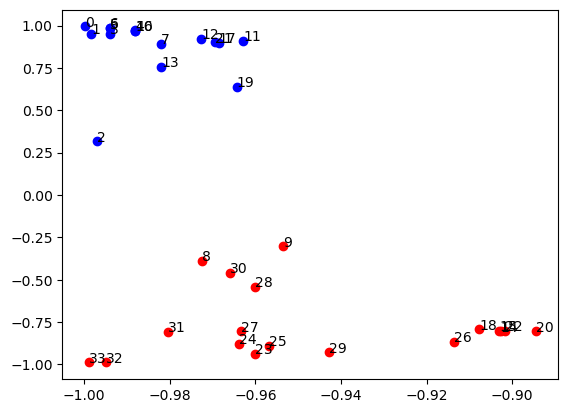

24回目 ARI : 0.8822575413558222

===========================25回目============================
Trained_node_number_is : [0, 3, 6, 20, 25, 32]


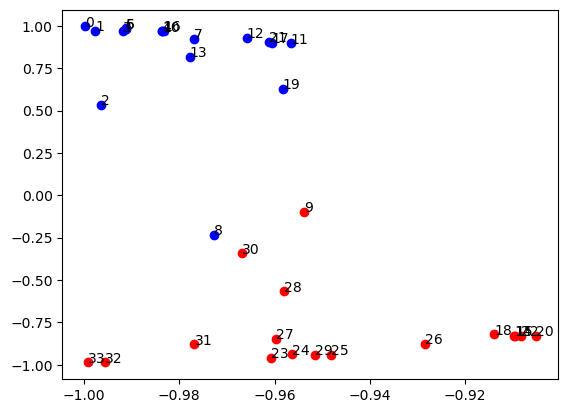

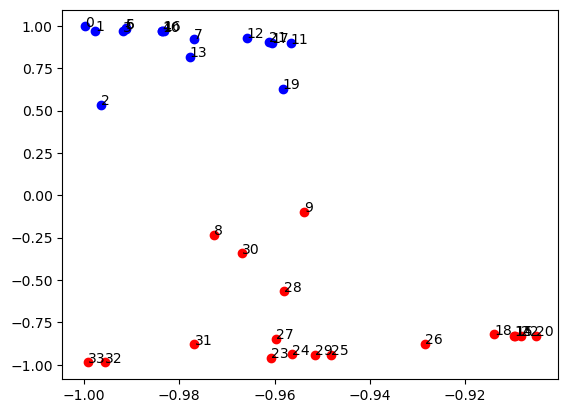

25回目 ARI : 0.8822575413558222

===========================26回目============================
Trained_node_number_is : [0, 8, 10, 25, 27, 31]


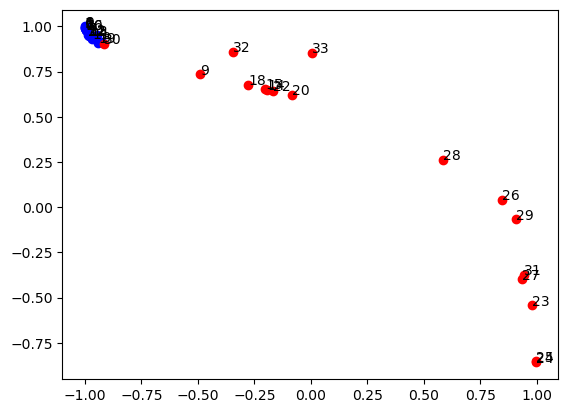

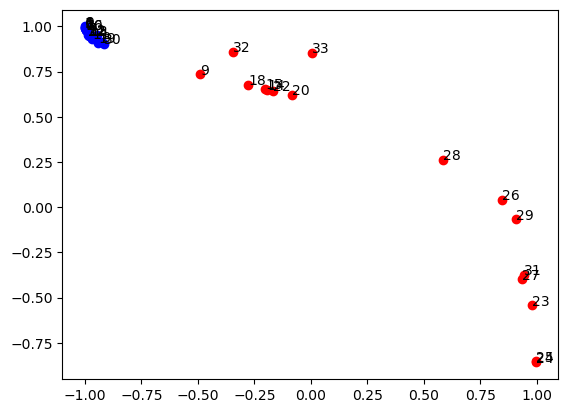

26回目 ARI : 0.8822575413558222

===========================27回目============================
Trained_node_number_is : [2, 3, 7, 18, 23, 32]


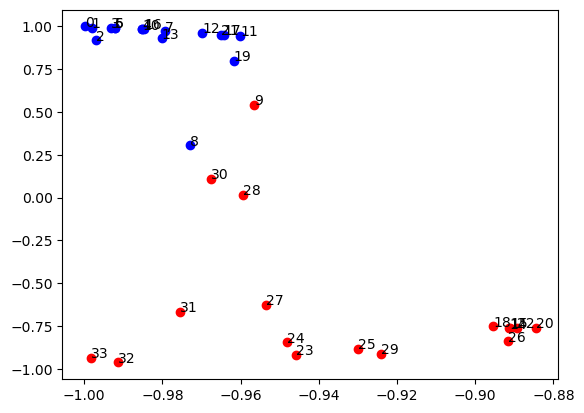

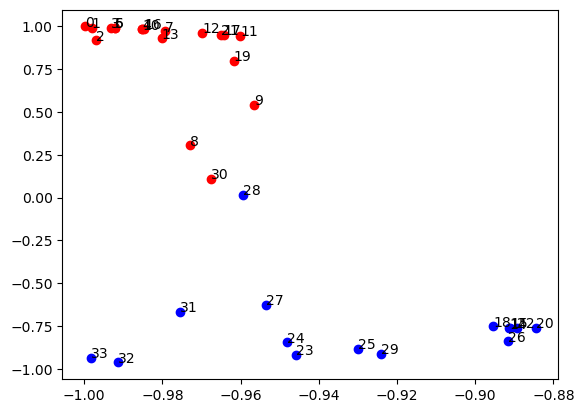

27回目 ARI : 0.7717250324254216

===========================28回目============================
Trained_node_number_is : [1, 4, 21, 22, 32, 33]


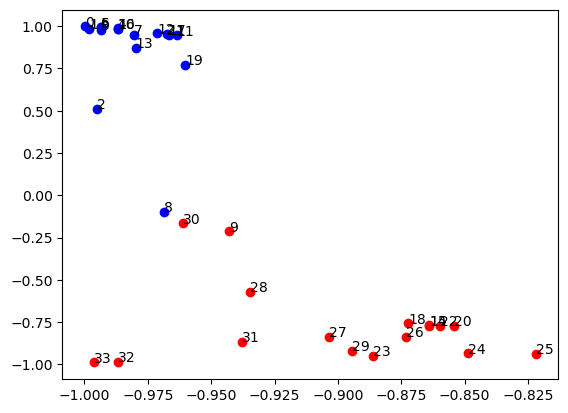

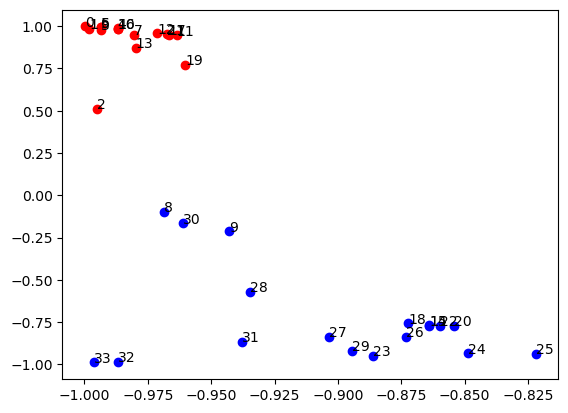

28回目 ARI : 0.8822575413558222

===========================29回目============================
Trained_node_number_is : [0, 1, 4, 22, 25, 30]


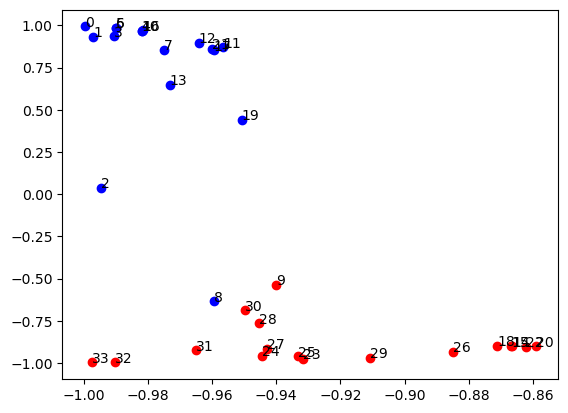

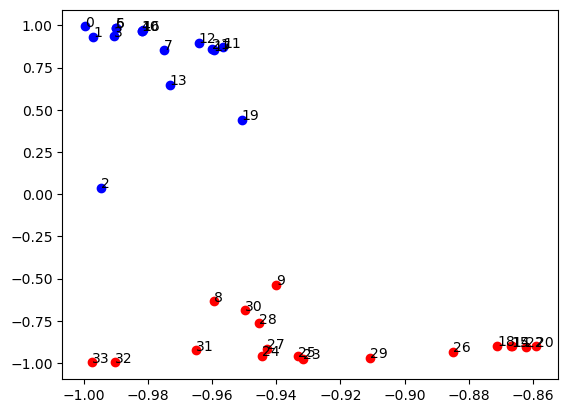

29回目 ARI : 0.8822575413558222

===========================30回目============================
Trained_node_number_is : [1, 9, 10, 11, 15, 32]


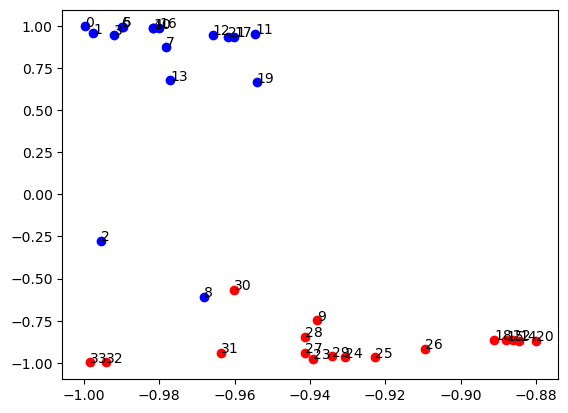

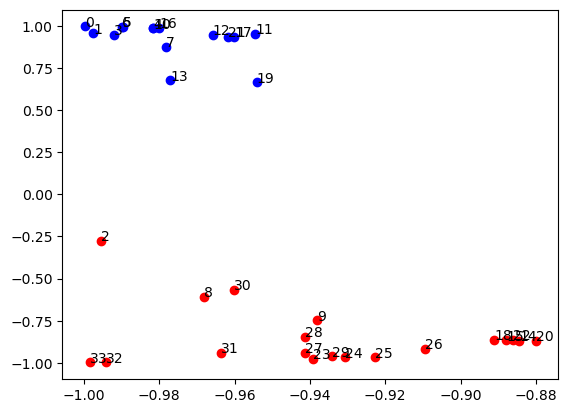

30回目 ARI : 0.7717250324254216

===========================31回目============================
Trained_node_number_is : [8, 11, 15, 21, 24, 29]


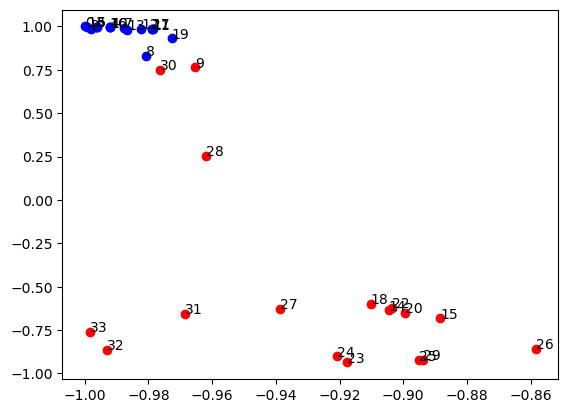

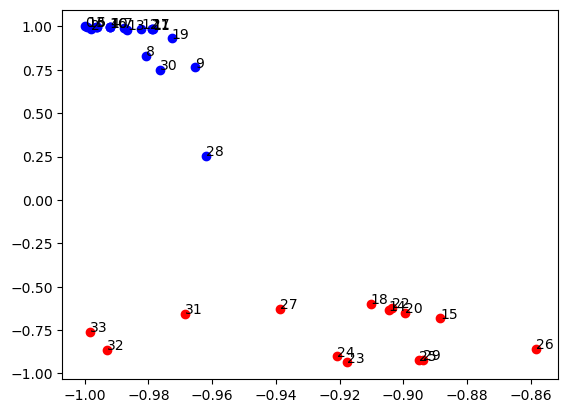

31回目 ARI : 0.6684671059738576

===========================32回目============================
Trained_node_number_is : [8, 11, 16, 24, 28, 29]


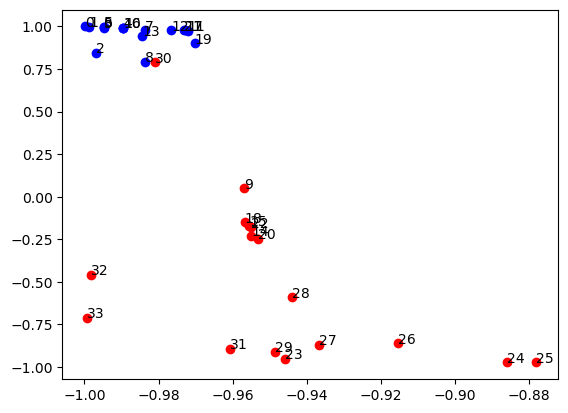

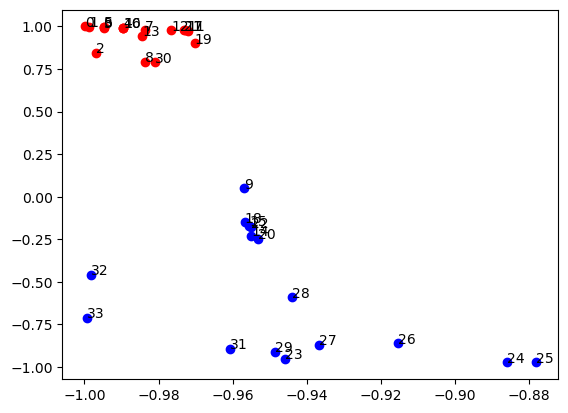

32回目 ARI : 0.8822575413558222

===========================33回目============================
Trained_node_number_is : [7, 9, 16, 21, 23, 24]


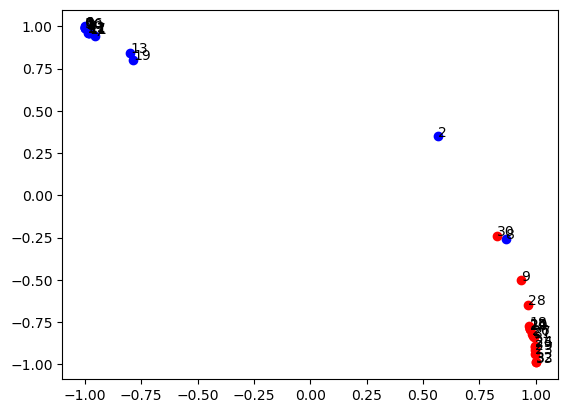

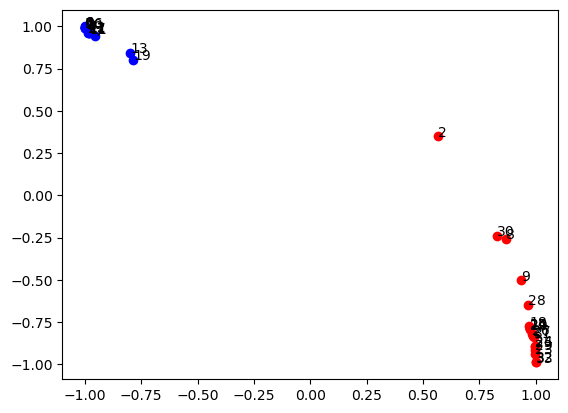

33回目 ARI : 0.7717250324254216

===========================34回目============================
Trained_node_number_is : [6, 7, 17, 20, 30, 33]


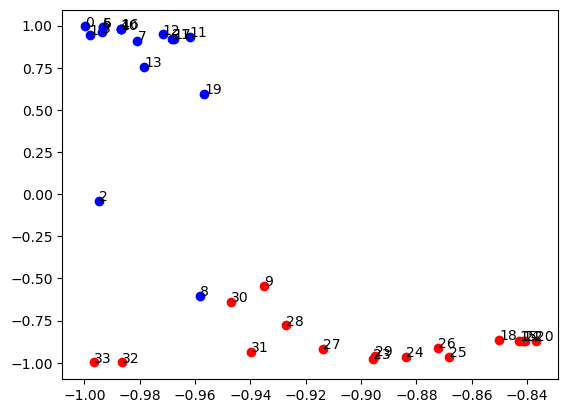

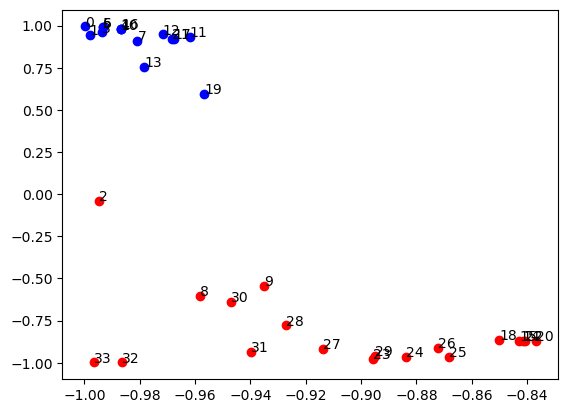

34回目 ARI : 0.7717250324254216

===========================35回目============================
Trained_node_number_is : [7, 8, 16, 18, 25, 27]


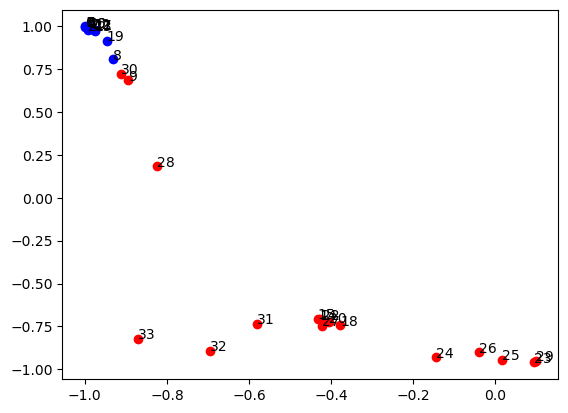

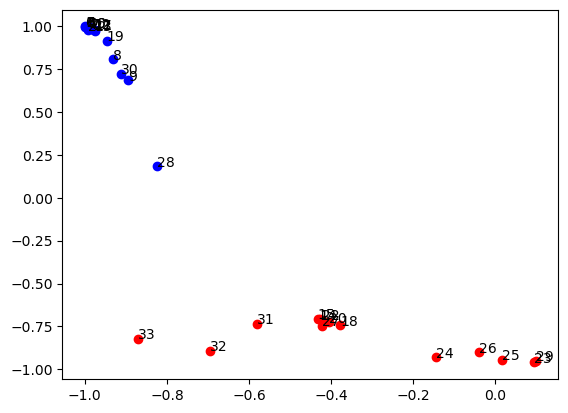

35回目 ARI : 0.6684671059738576

===========================36回目============================
Trained_node_number_is : [9, 10, 12, 17, 29, 32]


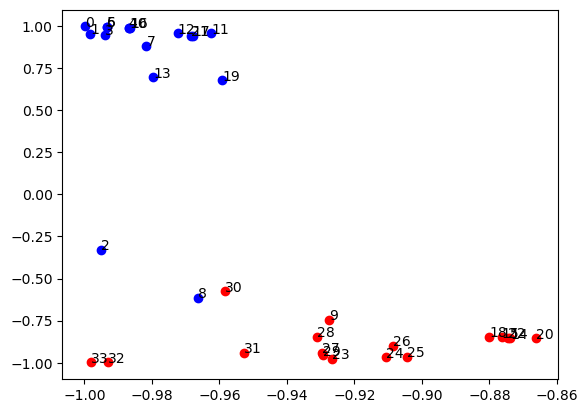

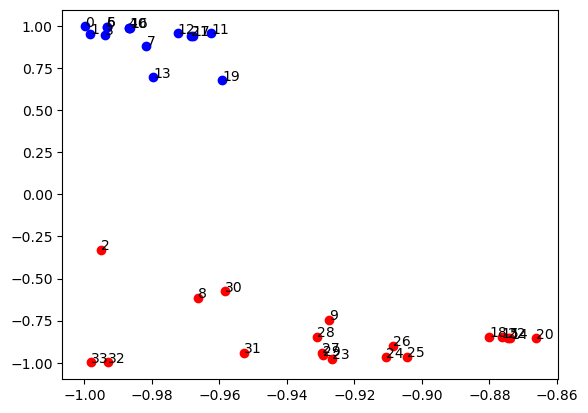

36回目 ARI : 0.7717250324254216

===========================37回目============================
Trained_node_number_is : [2, 5, 6, 14, 24, 33]


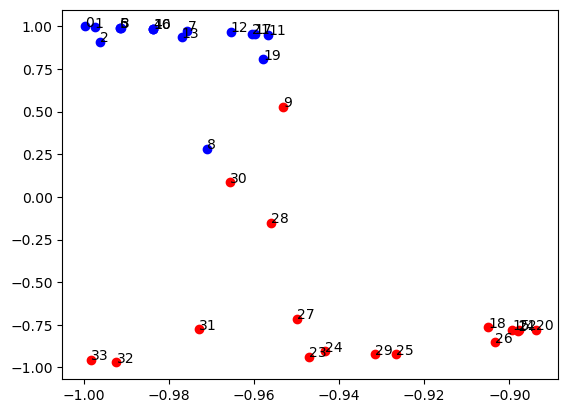

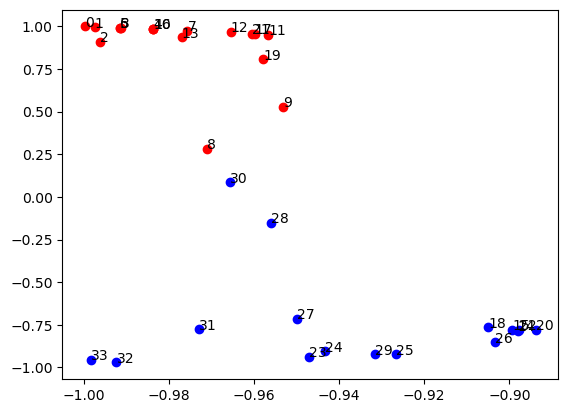

37回目 ARI : 0.8822575413558222

===========================38回目============================
Trained_node_number_is : [3, 4, 12, 23, 24, 26]


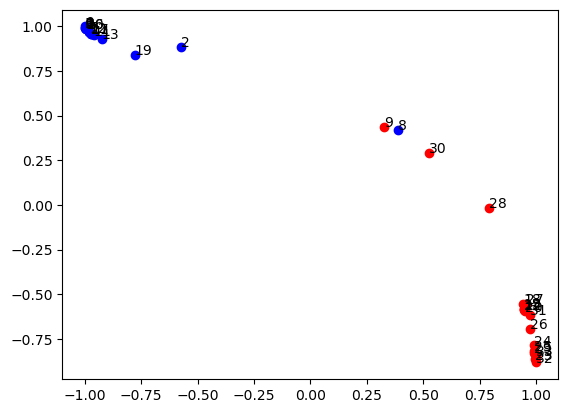

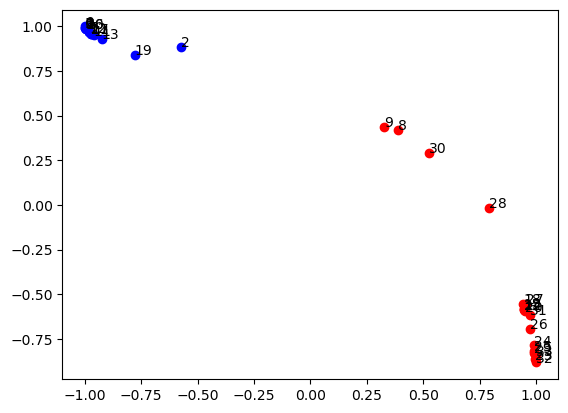

38回目 ARI : 0.8822575413558222

===========================39回目============================
Trained_node_number_is : [6, 12, 16, 18, 23, 25]


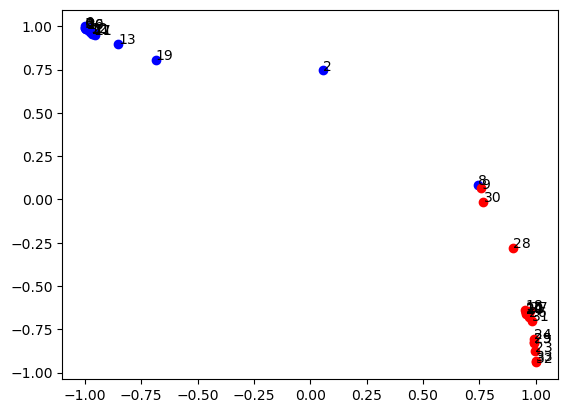

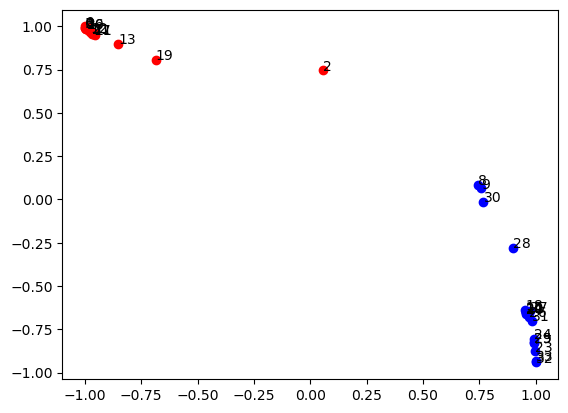

39回目 ARI : 0.8822575413558222

===========================40回目============================
Trained_node_number_is : [0, 5, 12, 24, 29, 30]


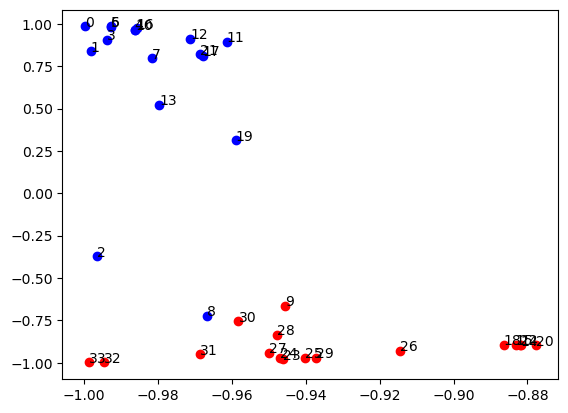

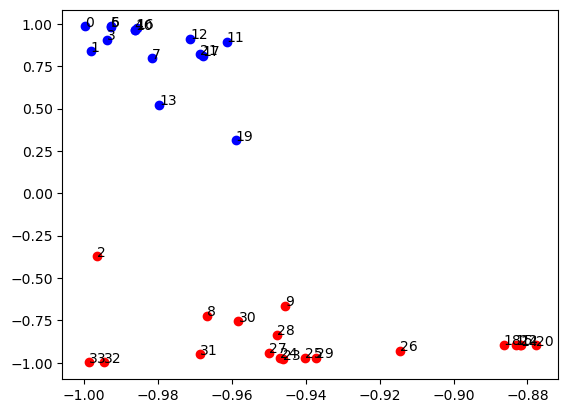

40回目 ARI : 0.7717250324254216

===========================41回目============================
Trained_node_number_is : [0, 8, 9, 13, 14, 23]


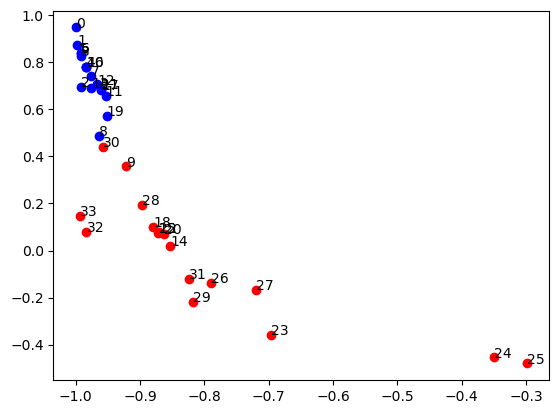

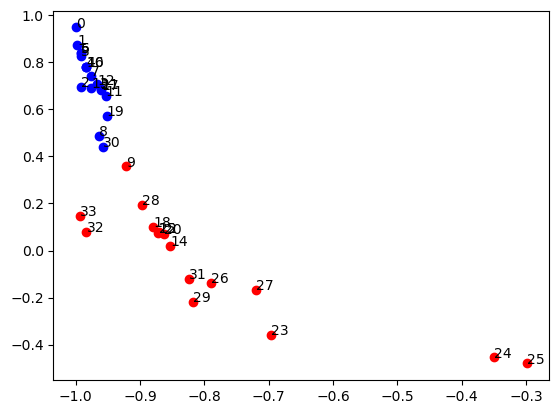

41回目 ARI : 0.8822575413558222

===========================42回目============================
Trained_node_number_is : [0, 10, 12, 23, 25, 26]


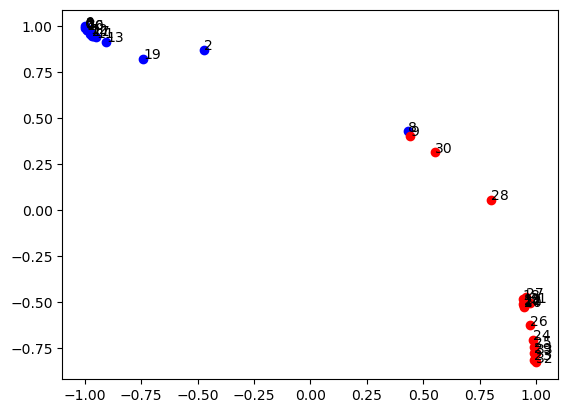

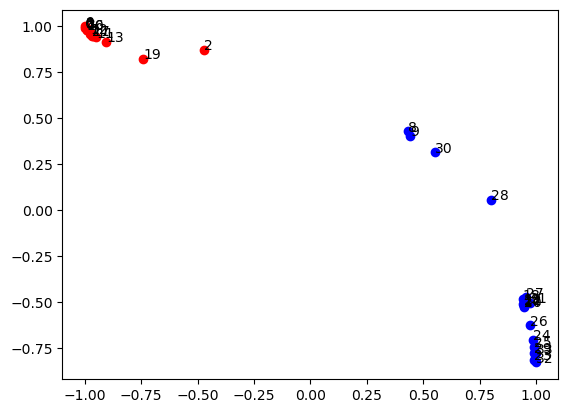

42回目 ARI : 0.8822575413558222

===========================43回目============================
Trained_node_number_is : [1, 4, 14, 16, 20, 32]


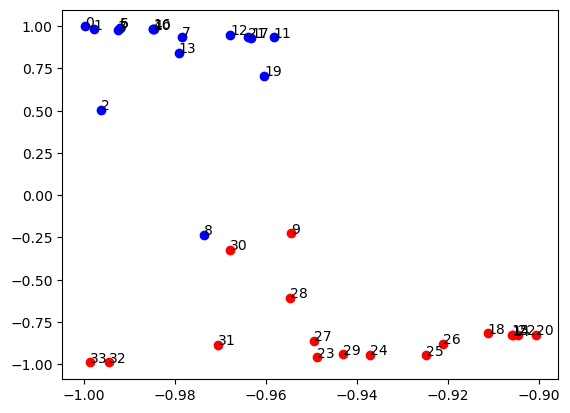

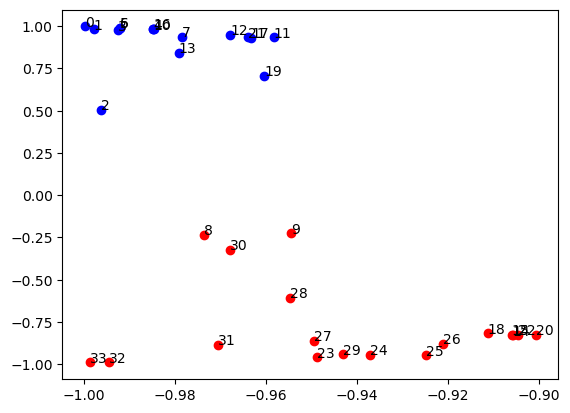

43回目 ARI : 0.8822575413558222

===========================44回目============================
Trained_node_number_is : [4, 13, 15, 19, 30, 33]


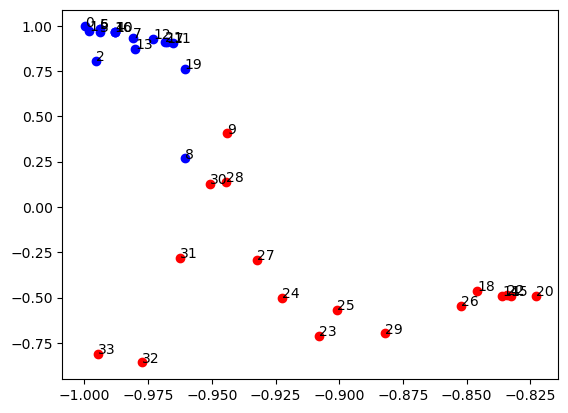

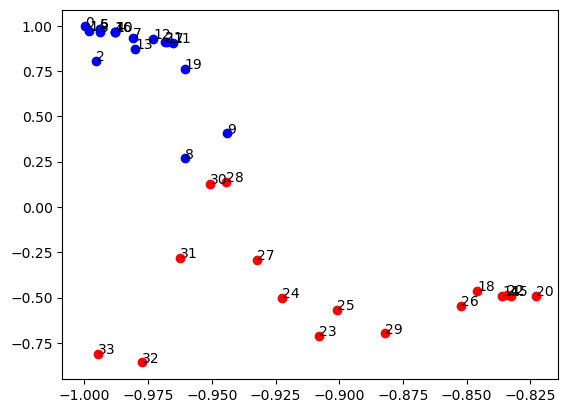

44回目 ARI : 0.8822575413558222

===========================45回目============================
Trained_node_number_is : [1, 11, 19, 20, 23, 32]


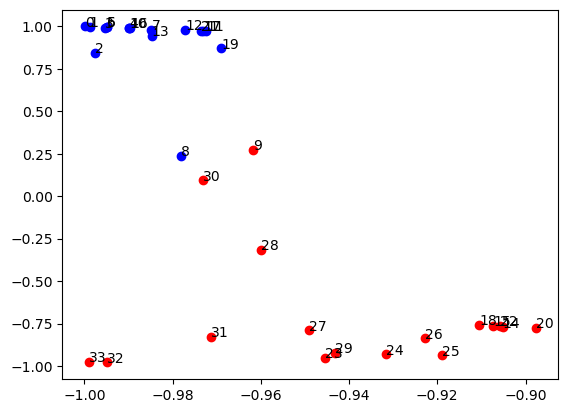

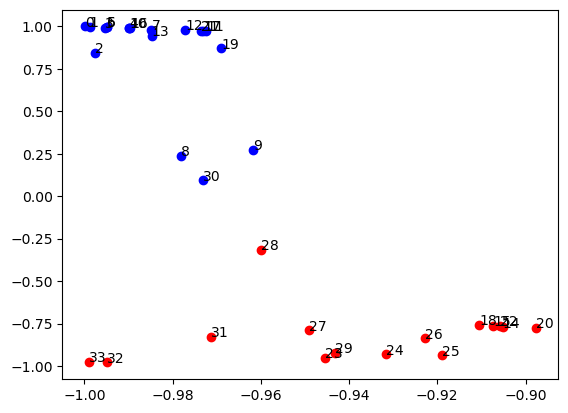

45回目 ARI : 0.7717250324254216

===========================46回目============================
Trained_node_number_is : [3, 6, 15, 16, 32, 33]


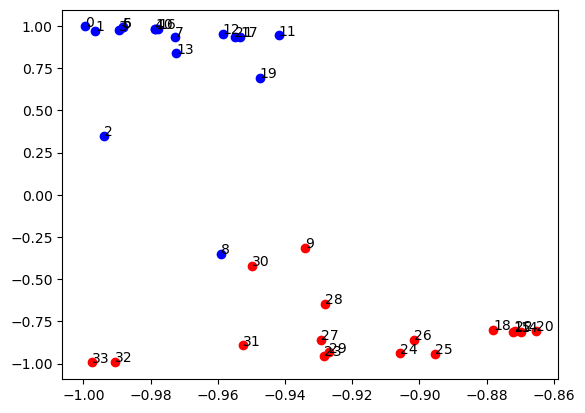

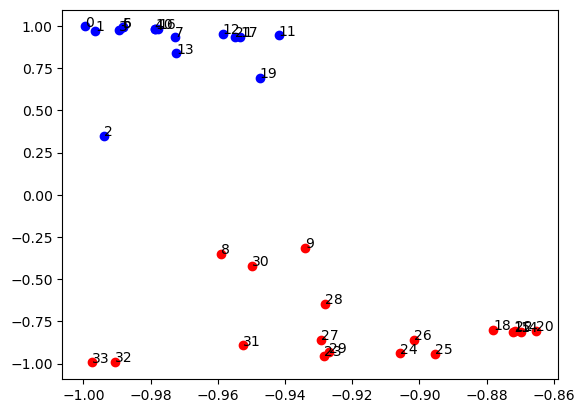

46回目 ARI : 0.8822575413558222

===========================47回目============================
Trained_node_number_is : [1, 5, 9, 13, 20, 29]


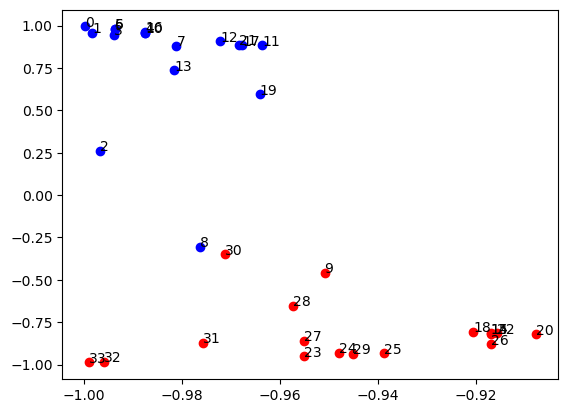

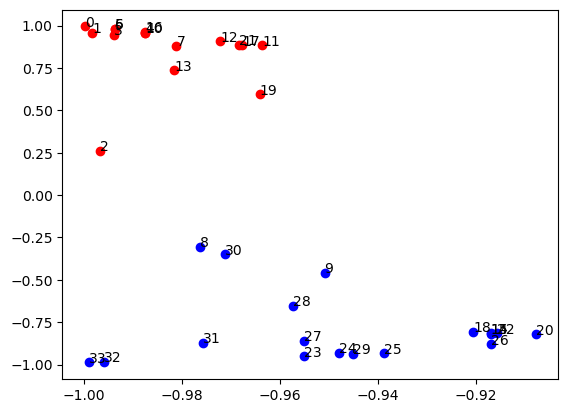

47回目 ARI : 0.8822575413558222

===========================48回目============================
Trained_node_number_is : [2, 7, 13, 15, 20, 28]


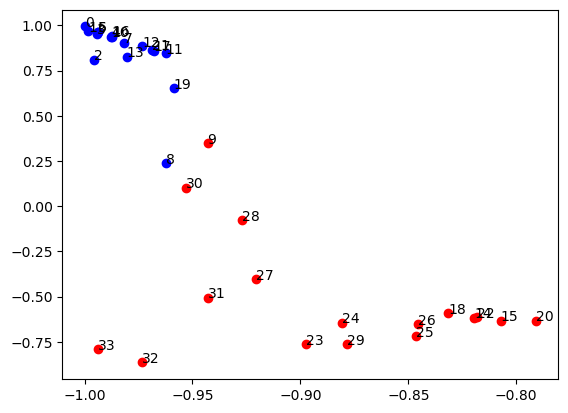

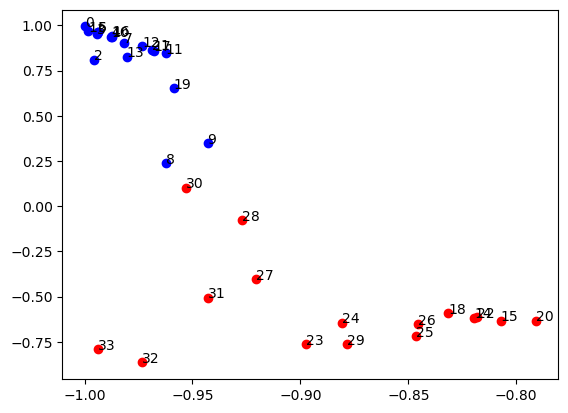

48回目 ARI : 0.8822575413558222

===========================49回目============================
Trained_node_number_is : [5, 10, 12, 29, 31, 33]


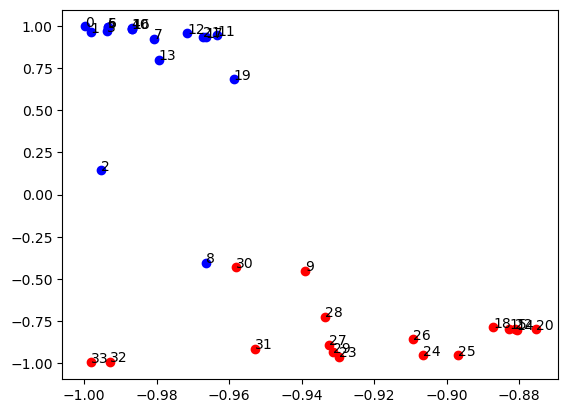

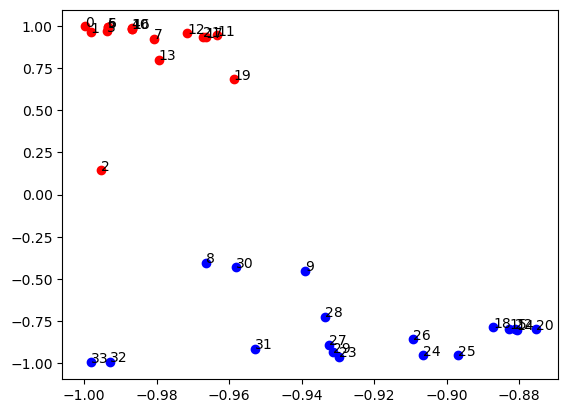

49回目 ARI : 0.8822575413558222

===========================50回目============================
Trained_node_number_is : [3, 7, 9, 10, 20, 23]


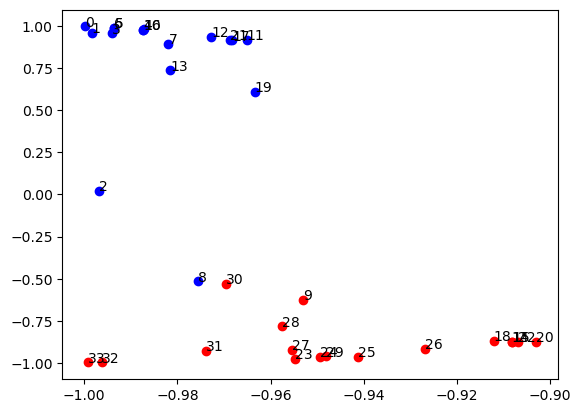

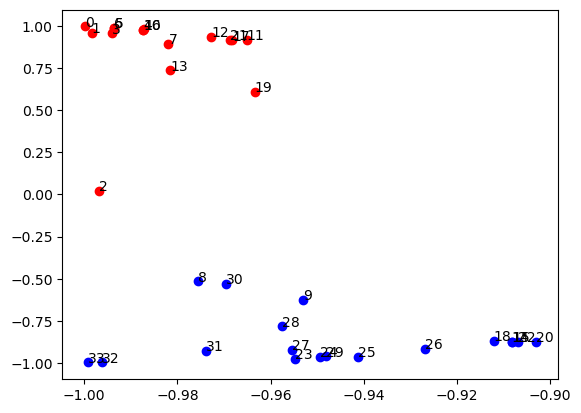

50回目 ARI : 0.8822575413558222

最大ARI([4, 7, 10, 16, 18, 20, 21, 23, 24, 25, 26, 28, 29, 32, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50]回目実行) : 0.8822575413558222
最小ARI([19, 31, 35]回目実行) : 0.6684671059738576


In [31]:
ARI_list, max_EVM, min_EVM ,max_pred, min_pred = gcn.exec_to_kmedoids(TIMES,TRAIN_ALL,DEFAULT,NUM_TRAIN,EPOCH,VIEW_TRAIN,N_CLUSTER,TRUE_LABEL)

In [32]:
num = 0
for i in range(len(ARI_list)):
    num += ARI_list[i]

mean = num/len(ARI_list)
print(f"平均 : {mean}")

平均 : 0.8230025120882333


In [33]:
name = "gcn_"+str(N_CLUSTER)+".txt"
with open(name,'w') as f:
    for i in range(len(max_pred)):
        if i+1 == len(max_pred):
            f.write(str(max_pred[i]))
        else:
            f.write(str(max_pred[i])+',')


In [34]:
print(stdev(ARI_list))

0.06672681824554758
